    О датасете:

    - Эти данные содержат информацию о более чем 1000 американских горках. Информация была взята из Википедии.


Задача: 

- Подсмотреть, что представляют из себя данные.
- Очистить, если необходимо, данные и подготовить их к анализу.
- Далее более подробно проанализировать датасет и визуализировать его.
- В конце я отвечу на вопрос: "В каких местах самые быстрые американские горки (минимум 10)?".

1. Импортируем библиотеки и загружаем данные ("читаем" датасет)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('coaster_db.csv')
print('Импорт успешно произведен')
df.sample(5)

Импорт успешно произведен


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
745,Star Flyer (roller coaster),NaN,NaN,"Barangay 1, Pasay, Philippines",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
231,The Beastie (Wonderland Sydney),NaN,NaN,"Eastern Creek, New South Wales, New South Wale...",NaN,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
529,Goliath (Six Flags Magic Mountain),"4,500 ft (1,400 m)",85 mph (137 km/h),Six Flags Magic Mountain,Operating,"February 11, 2000",Steel,Giovanola,48 in (122 cm),Mega Coaster,...,85 mph,137 km/h,85.0,mph,85.0,235.0,ft,NaN,0,NaN
246,Knightmare (Camelot),NaN,40 mph (64 km/h),Other,Removed,NaN,Other,Zierer,130 cm (4 ft 3 in),NaN,...,40 mph,64 km/h,40.0,mph,40.0,87.0,ft,NaN,0,5.0
942,Harpy (Xishuangbanna Theme Park),"2,903.5 ft (885.0 m)",52.8 mph (85.0 km/h),Xishuangbanna Theme Park,Closed,"September 26, 2015",Steel – Flying,Bolliger & Mabillard,NaN,Flying Coaster (Custom),...,52.8 mph,85.0 km/h,52.8,mph,52.8,131.3,ft,NaN,2,NaN


2.  Первичное понимание и анализ данных

In [4]:
print('Размерность набора данных:')
df.shape

Размерность набора данных:


(1087, 56)

In [5]:
print('Типы данных')
df.dtypes

Типы данных


coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


3. Приведение данных в нужный нам вид (очистка данных): 

- Удаление ненужных столбцов и строк
- Выявление повторяющихся столбцов
- Переименование столбцов
- Создание функции

In [7]:
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 
       'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean',
       'speed_mph', 'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [8]:
print('Колонки в таблице:')
df.columns

Колонки в таблице:


Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [14]:
print('Размерность')
df.shape

print('Типы данных')
df.dtypes

Размерность
Типы данных


coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

4. Мне не все названия столбцов нравятся, поэтому я решила некоторые из них переименовать: 

In [15]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'speed_mph':'Speed_mph',
                   'latitude': 'Latitude',
                   'opening_date_clean': 'Opening_date',
                   'longitude': 'longitude',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

5. Посмотрим на количество отсутствующих значений:

In [16]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
longitude          275
Type_Main            0
Opening_date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [18]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_date'])].reset_index(drop=True).copy()

In [19]:
df.shape

(990, 13)

6. Дальнейший анализ данных. Далее мы займемся визуализацией и построением графиков.

Text(0, 0.5, 'Количество')

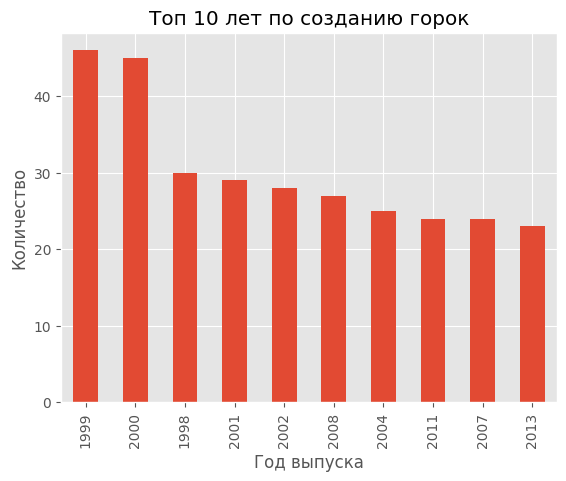

In [87]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar',title='Топ 10 лет по созданию горок')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество')

Text(0.5, 0, 'Скорость(мили в час)')

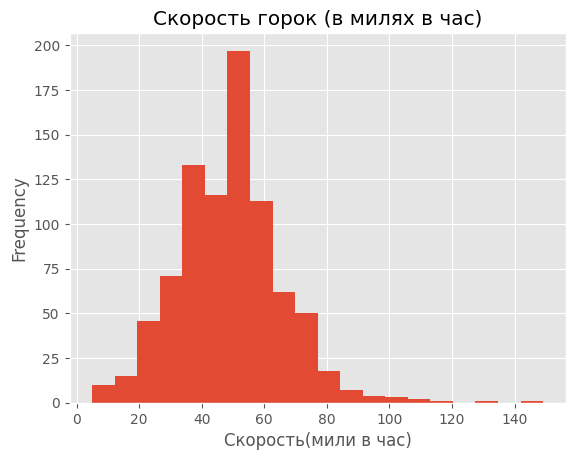

In [86]:
ax = df['Speed_mph'].plot(kind='hist', bins = 20, title='Скорость горок (в милях в час)')
ax.set_xlabel('Скорость(мили в час)')

<Axes: title={'center': 'Зависимость скорости горки от высоты (библиотека Matplotlib)'}, xlabel='Speed_mph', ylabel='Height_ft'>

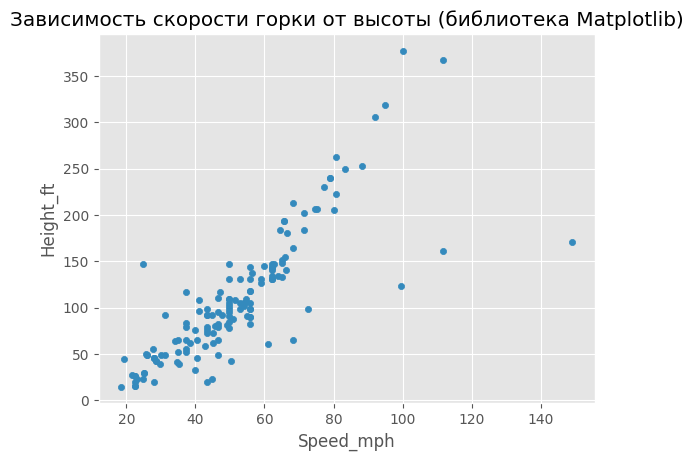

In [85]:
df.plot(kind='scatter', x='Speed_mph', y='Height_ft',  title='Зависимость скорости горки от высоты (библиотека Matplotlib)')

Text(0.5, 1.0, 'Зависимость скорости горки от высоты (библиотека Seaborn)')

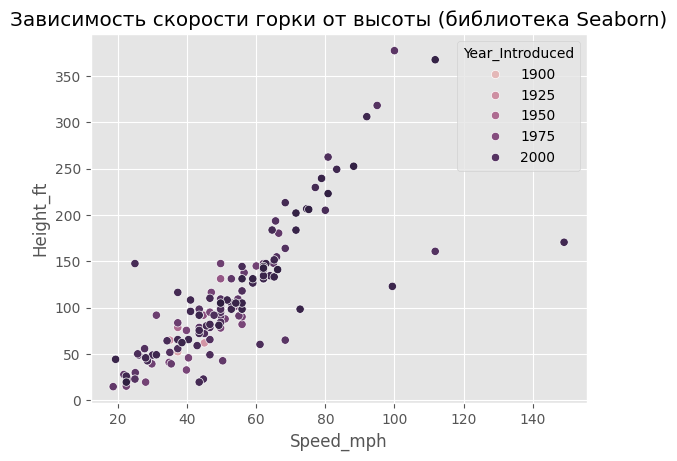

In [84]:
ax = sns.scatterplot(x='Speed_mph',
                     y='Height_ft',
                     hue='Year_Introduced',
                     data=df)
ax.set_title('Зависимость скорости горки от высоты (библиотека Seaborn)')

7. Посмотрим на корреляцию и построим график тепловой карты

In [73]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

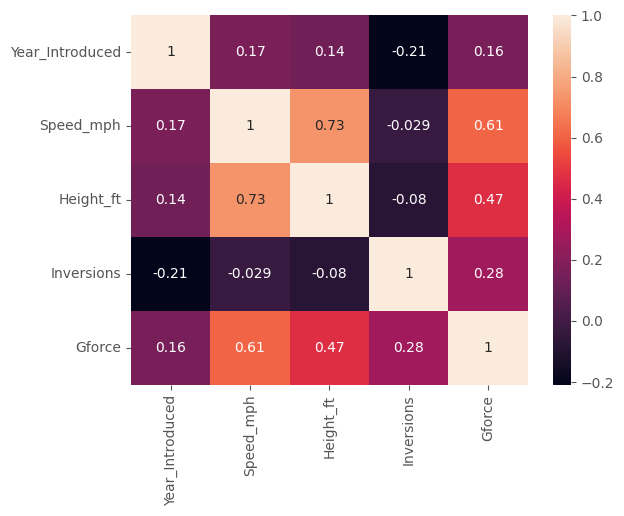

In [75]:
sns.heatmap(df_corr, annot=True)

8. Далее мы попробуем ответить на вопрос, нарисовав график: "В каких местах самые быстрые американские горки (минимум 10)?"

<Axes: ylabel='Location'>

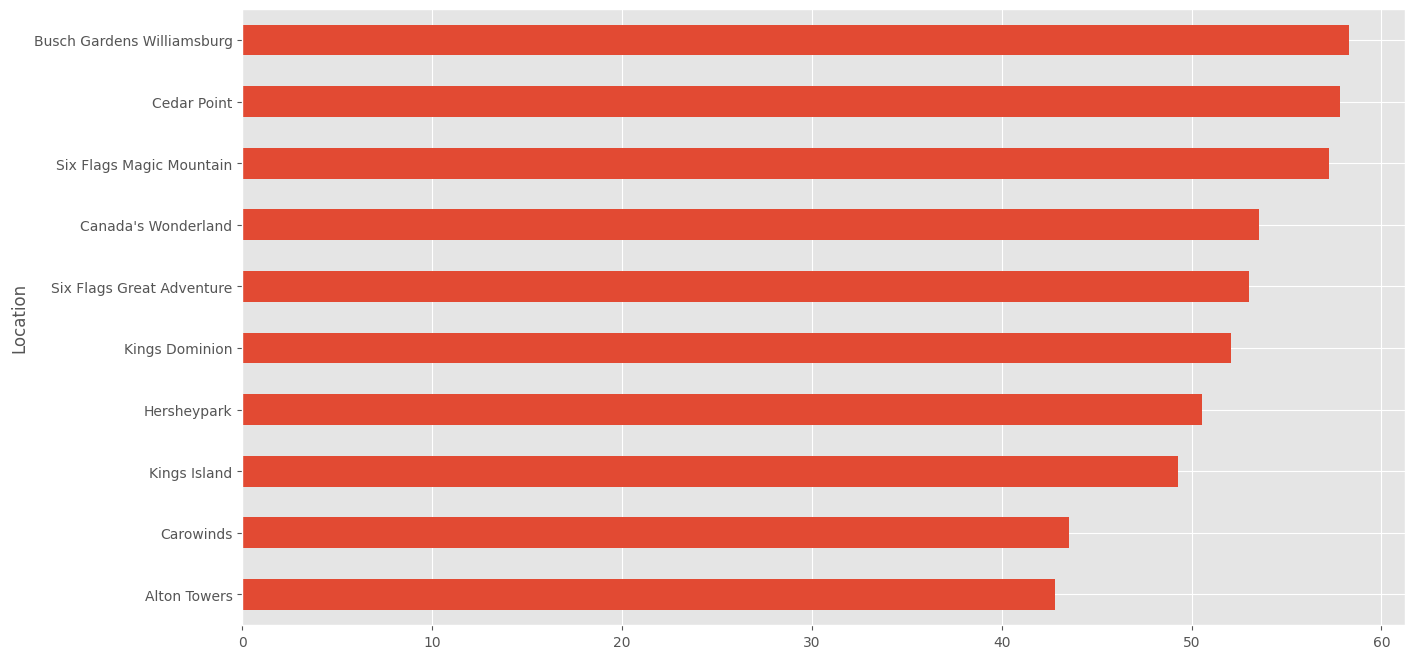

In [83]:
df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean', 'count'])\
    .query('count >=10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh', figsize=(15,8), title='Средняя скорость по локациям')